In [78]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1: Generate sample data

In [88]:
# Generate some sample data with two features
np.random.seed(0)
X = 2 * np.random.rand(10, 2)  # 10 training examples, 2 features each
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(10)  # Corresponding target values

print("Feature Matrix (X):\n", X)
print("\nTarget Values (y):\n", y)

Feature Matrix (X):
 [[1.09762701 1.43037873]
 [1.20552675 1.08976637]
 [0.8473096  1.29178823]
 [0.87517442 1.783546  ]
 [1.92732552 0.76688304]
 [1.58345008 1.05778984]
 [1.13608912 1.85119328]
 [0.14207212 0.1742586 ]
 [0.04043679 1.66523969]
 [1.5563135  1.7400243 ]]

Target Values (y):
 [15.93885376 12.86025382 13.31393763 14.68915754 11.06340194 14.69291802
 17.52866995  4.55534433 14.71726346 15.91469631]


#### 2: Add Bias Term
To include the intercept term (𝜃0), we'll add a column of ones to the input features.

In [90]:
# Add the bias term (x_0 = 1)
X_b = np.c_[np.ones((10, 1)), X]  # Add x0 = 1 to each instance
X_b

array([[1.        , 1.09762701, 1.43037873],
       [1.        , 1.20552675, 1.08976637],
       [1.        , 0.8473096 , 1.29178823],
       [1.        , 0.87517442, 1.783546  ],
       [1.        , 1.92732552, 0.76688304],
       [1.        , 1.58345008, 1.05778984],
       [1.        , 1.13608912, 1.85119328],
       [1.        , 0.14207212, 0.1742586 ],
       [1.        , 0.04043679, 1.66523969],
       [1.        , 1.5563135 , 1.7400243 ]])

#### 3: Initialize Parameters
Initialize the parameters (𝜃) to zero or small random values.

In [110]:
# Initialize parameters
theta = np.zeros((3, 1))  # For 2 features (plus the bias term)
alpha = 0.01  # Learning rate
num_iters = 30  # Number of iterations

#### 5: Define the Hypothesis Function
The hypothesis function ℎ(𝑥) for linear regression.

In [111]:
# Hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

#### 6: Compute the cost function

In [112]:
# Cost function
def cost_function(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    return (1 / (2 * m)) * np.sum((h - y) ** 2)

#### 7: Gradient Descent Algorithm
Implement the gradient descent algorithm.

In [113]:
# Compute the gradient
def compute_gradient(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    return (1 / m) * np.dot(X.T, (h - y.reshape(-1, 1)))

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iters):
    cost_history = []
    for i in range(num_iters):
        gradient = compute_gradient(X, y, theta)
        theta = theta - alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
        
        print(f"Iteration {i+1}: Cost {cost}")
    return theta, cost_history


#### 8: Run Gradient Descent
Set hyperparameters (learning rate and number of iterations) and run the gradient descent algorithm.

In [114]:
# Run gradient descent
theta_final, cost_history = gradient_descent(X_b, y, theta, alpha, num_iters)

print("Final parameters:", theta_final)

# Print first 10 cost history values for brevity
print("Cost history (first 10 values):", cost_history[:10])

Iteration 1: Cost 903.7522348629035
Iteration 2: Cost 838.821783971146
Iteration 3: Cost 779.0787667568068
Iteration 4: Cost 724.1144776534438
Iteration 5: Cost 673.552187282992
Iteration 6: Cost 627.0446495287838
Iteration 7: Cost 584.2718026149869
Iteration 8: Cost 544.938649108044
Iteration 9: Cost 508.77330092801753
Iteration 10: Cost 475.5251765389498
Iteration 11: Cost 444.9633384845627
Iteration 12: Cost 416.8749603553398
Iteration 13: Cost 391.06391312130245
Iteration 14: Cost 367.34946154713793
Iteration 15: Cost 345.5650621279017
Iteration 16: Cost 325.5572546490057
Iteration 17: Cost 307.18464008799066
Iteration 18: Cost 290.31693814166414
Iteration 19: Cost 274.83411818428823
Iteration 20: Cost 260.62559794402785
Iteration 21: Cost 247.58950462897994
Iteration 22: Cost 235.6319936437014
Iteration 23: Cost 224.6666204149236
Iteration 24: Cost 214.61376119354748
Iteration 25: Cost 205.4000790213506
Iteration 26: Cost 196.95803134719893
Iteration 27: Cost 189.22541605088253
It

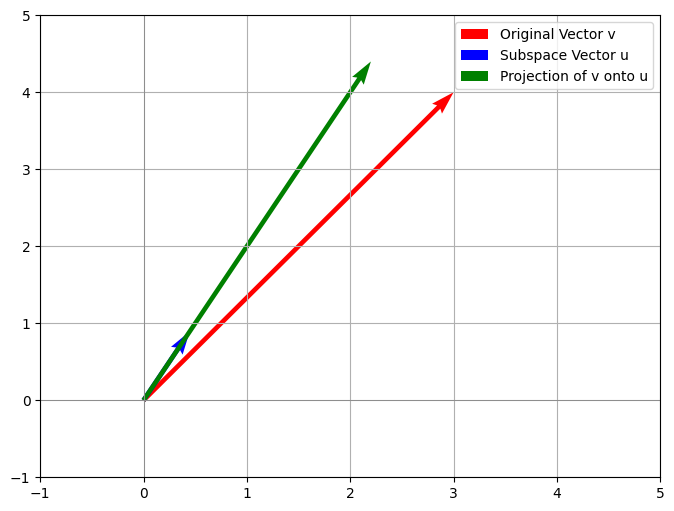

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define a random vector
v = np.array([3, 4])

# Define a subspace spanned by a single vector (line)
u = np.array([1, 2])
u = u / np.linalg.norm(u)  # Make it a unit vector

# Compute the projection of v onto u
projection = np.dot(v, u) * u

# Plotting
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector v')
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='b', label='Subspace Vector u')
plt.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color='g', label='Projection of v onto u')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.legend()
plt.show()
